In [135]:
import csv
import requests
import pandas as pd
import numpy as np

from lxml import etree

SRU_BASE_URL = 'http://jsru.kb.nl/sru/sru?'
MAX_RECORDS = 1000
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [136]:
def jsru_query(collection, cql, filename):
    '''
    Query jSRU to obtain from collection context (text), date and title fields,
    write results to tab separated CSV file.
    '''

    start_record = 1

    request_payload = {
        'operation': 'searchRetrieve',
        'x-collection': collection,
        'x-fields': 'content',
        'maximumRecords': MAX_RECORDS,
        'startRecord': start_record,
        'query': cql
    }

    sru_response = requests.get(SRU_BASE_URL, params=request_payload)
    sru_tree = etree.fromstring(sru_response.content)

    num_records = sru_tree.find('{http://www.loc.gov/zing/srw/}numberOfRecords')
    num_records = int(num_records.text)
    
    csv_writer = csv.writer(open(filename, 'w', newline=''), delimiter='\t')
    csv_writer.writerow(['title', 'date', 'text'])

    records_left = (num_records >= 1)
    while records_left:
        
        for record in sru_tree.iter('{http://www.loc.gov/zing/srw/}recordData'):
            title = record.find('{http://purl.org/dc/elements/1.1/}title').text
            date = record.find('{http://purl.org/dc/elements/1.1/}date').text
            text = record.find('content').text

            csv_writer.writerow([title, date, text])

        records_left=(start_record + MAX_RECORDS <= num_records)
        if records_left:
            start_record = start_record + MAX_RECORDS
            request_payload['startRecord'] = start_record
            sru_response = requests.get(SRU_BASE_URL, params=request_payload)
            sru_tree = etree.fromstring(sru_response.content)

Here you can run the function called jsru_query that is defined in the cell above. This function has three parameters.

1) the collection, <br>
2) the query, and <br>
3) the output of the harvesting. <br>

In [216]:
jsru_query('ANP', 
           '"verenigde staten" and nederland not duitsland and date within "01-01-1971 31-12-1979"', 
           'output.tsv')

Now we will load the tsv into python using a library called Pandas. <br>
A table or spreadsheet is called a dataframe in Pandas. 

In [217]:
df = pd.read_csv('output.tsv', delimiter='\t') #define the name of your output file here

In [218]:
df.head() #this command shows you the first lines of the file change head into tail to see what happens

,title,date,text
0,ANP Nieuwsbericht - 08-11-1976 - 61,1976/11/08 00:00:00,"\n Red.: \n aa \n Datum: \n 8-11-76 \n *Tijd: 7 \n -7^-8-pf \n Onderwerp: F^^ schaken \n 3. \n 4. \n 7. \n 8. \n 9. \n 10. \n 11. \n 12 \n 13. \n 14. \n 15. \n SCHAKEN. - Op de Olympiade in Haifa hebben de Verenigde Staten \n in de voorlaatste ronde met 3-1 gewonnen van Colombia. Nederland- \n Nederland staat tegen Canada gelijk met anderhalf tegen anderhalf \n en ëên afgebroken partij. Dat is de partij tussen Yanofsky en \n Sosonko. Als Sosonko deze partij wint, staan Nederland en \n de Verenigde Staten bij het ingaan van de laatste ronde samen \n aan kop in het algemeen klassement. Obk Engeland is nog kandidaat- \n kandidaat voor de eindoverwinning, Als de Britten de afgebroken \n ^, -, \n partij^aah Chili winnen, komen zij een half punt achter op de \n Verenigde Staten. — De damesolympiade is gewonnen door Israel \n Met nog een ronde te spelen kan Israel niet meer ingehaald \n worden. Nederland is verwikkeld in een gevecht om de tweede \n plaats met als belangrijkste concurrenten Engeland en de Verenigde- \n Verenigde Staten. \n Bron: \n Regets. \n anp \n 13 \n\n"
1,ANP Nieuwsbericht - 26-08-1979 - 72,1979/08/26 00:00:00,"\n Red.: Datum: Ttjd: Onderwerp: \n kuy 26-8-79 4....................... hockeul \n 1. ' voor dames____^ Hockey - Bij de strijd om de wereldbeker/in Vancouver 2. hebben naast Nederland en Australie, ook Westduitsland 3. en de Verenigde Staten zich geplaatst voor de halve 4. finales. Westduitsland deed dit dank zij een overwinning * 5. van 2-0 op Canada, de Verenigde Staten behaalden een 6. onverwachte overwinning van 2-1 op Engeland. Nederland 7. komt in de halve finales uit tegen Australie, West-Duitslan 8. 9. tegen de Verenigde Staten. - 10. 11. * 12. 13. 14. 15. Bron: Regets: /X \n\n"
2,ANP Nieuwsbericht - 16-06-1971 - 8,1971/06/16 00:00:00,"\n Red. \n Datum: \n Tijd: \n Ond \n erwerp: \n krul \n 16-6-7. 1 /7^. 8.................. Ylees......... VS. \n 1. De Verenigde staten gaan de inspectie op geimporteerd vlee, 2. Jook uit Nederland/verscherpen. Het Amerikaanse ministerie 3. van landbouw zal permanente inspecteurs aanstellen in de 5 4. landen, die voor de Verenigde Staten de voornaamste vleesle5- . veranciers zijn. Behalve Nederland zijn dat Denemarken, Ar*- 6. 7. 8. 9. 10. 11. gentinië, NieuwZeeland en Australië * 12. 13. . 14. 15. Bron: rtr Regets: cl 650. 1. 18. 50. 000. 10. 70. vdm. \n\n"
3,ANP Nieuwsbericht - 08-01-1975 - 5,1975/01/08 00:00:00,\n Red.: Datum: Tijd: Onderwerp: \n kuy a-1-75 2355........................ vsklm \n De Verenigde Staten hebben Nederland voorgesteld om de 2 besprekingen over de transatlantische vluchten van de KLM eind deze maand voort te zetten in den Haag. Het overleg 4 zal gaan over de wens van de Verenigde Staten üe KLM-vluchten / op transatlantische routes te beperken. Eerder besprekingen in Washington hebben niet tot een door Nederland gewenst \n ? resultaat geleid. - \n 8. \n 10 \n 11. \n 12 \n 13. \n 14. \n 15 \n Bron: Regels: sv 6 \n\n
4,ANP Nieuwsbericht - 03-10-1979 - 119,1979/10/03 00:00:00,"\n Red. \n Datum: \n Tijd: \n Onderwerp: \n spa \n J-iO-79 \n 15 \n invest vs \n 1. \n Nederland neemt de eerste plaats in onder de buitenlandse \n 2. \n investeerders in de Verenigde Staten. Vorig jaar investeerden \n Nederlanders rechtstreeks achttien miljard gulden in de \n Amerikaanse economie, vier miljard meer dan in 1977. Voor \n de Nederlandse kapitaalmarkt is omgekeerd de Verenigde Staten het belangrijkst. Eind' 77 hadden meer dan duizend Amerikaanse \n 7. \n bedrijven ruim vier miljard do+lar in de Nederlandse economie \n belegd. De Amerikaanse statistieken laten ook een forse groei \n 9. \n zien van het aantal Nederlandse toeristen. Vorig jaar \n 10. \n reisden 140-duizend Nederlanders naar de Verenigde Staten. \n 11. \n 12 \n 13. \n 14. \n 15. \n Bron. \n anp \n Regeis: iQ \n\n"


In [225]:
df.describe() #this gives you some descriptive statistics about the dataset. 

,title,text
count,613,613
unique,613,611
top,ANP Nieuwsbericht - 29-03-1972 - 64,sport schaken achtste ronde schaak olympiade haifa heeft nederland eerste plaats behouden kwamen vier remises stand tegen ploeg engeland onze landgenoten hebben punten voet gevolgd door britten half punt derde vierde plaat klassement worden gedeeld door verenigde staten argentinië punten afgebroken partij bron telef regels
freq,1,2


In [219]:
df[5:10]

,title,date,text
5,ANP Nieuwsbericht - 03-10-1979 - 39,1979/10/03 00:00:00,"\n Red. \n Datum: \n Tijd: \n Onderwerp: \n spa \n 3-1. 0-79. \n invest. VS. \n 4. \n 5. \n 6. \n 10. \n 11. \n 12. \n 13. \n 14. \n 15. \n Nederland neemt de eerste plaats in onder de buitenlandse investeerders in de Verenigde Staten. Vorig jaar investeerden Nederlanders rechtstreeks achttien miljard gulden in de Amerikaanse economie, vier miljard meer dan in 1977. Voor de Nederlandse kapitaalmarkt is omgekeerd de Verenigde Staten het belangrijkst. Eind' 77 hadden meer dan duizend Amerikaanse bedrijven ruim vier miljard dollar in de Nederlandse economie belegd. De Amerikaanse statistieken laten ook een forse groei zien van het aantal Nederlandse toeristen. Vorig jaar reisden 140-duizend Nederlanders naar de Verenigde Staten. \n S' °"" = anp \n Regeis: iQ \n\n"
6,ANP Nieuwsbericht - 22-06-1972 - 13,1972/06/22 00:00:00,"\n Red.: \n Datur \n Tijd: \n Onderwerp: \n Krul. \n ..... 2. 2-6. ^. 72 \n 10. 30................... bridge. \n 7. \n 10. \n 11. \n 12. \n 13. \n 14. \n 15. \n Bridge: De dames van Italie hebben in Miami in de Verenigde- \n Verenigde Staten het Olympisch tournooi gewonnen. ZuidAfrika werd tweede, de Verenigde Staten derde. ^De Nederlandse da- mes werden achtste. Bij de heren wordt de finalepoule \n 4^^ \n gespeeld door Italie, Canada, Amerika, Frankrijk. Nederland \n is hier als 20e ge-eindigd \n B \n ron: \n Regets: 5^ \n 650. 1. 19. 50. 000. 10. 71 vdm. \n\n"
7,ANP Nieuwsbericht - 23-08-1974 - 21,1974/08/23 00:00:00,"\n Red.: Datum: Tijd: Onderwerp: janeen 23-8-74 tSBgg^ BHit. hedrijTan Nederland ^______________________________________ \n In Nederland zijn ruim duizend induatrigle veatigingon van buitenlandee ondernemingen. Volgeno de Economische Voorlichtingsdienst- komt rui* een/derde daarvan uit de Verenigde- Staten, gevolgd door Engeland en Weat-Duitoland^ De \n meeate buitenlandee ondernemingen zijn metaalbedrijven; dan volgen chemische^- Daarnaaet zijn er in Nederland \n bijna 4-honderd-50 deelnemingen en aanenwerkingen van buitenlandse ondernemingen. Ook hiervan komen de neeote uit de Verenigde Staten, gevolgd door Weat-Daitaland en Engeland. \n 10 \n ii \n 12 \n 13 \n 14. \n 15 \n Bron: Regeb: anp \n !S0 1. 21 20. 000. !. 72. vdm \n I \n\n"
8,ANP Nieuwsbericht - 07-11-1976 - 23,1976/11/07 00:00:00,\n Red.: \n kuy \n atum: \n Tijd: \n no^v \n Ont^werp: \n 7-11-76 2355 schaken \n 1. \n 2. \n 3. \n Schaken - Op de olympiade in Haifa hebben de Verenigde Staten in de voorlaatste ronde met 3-1 gewonnen van Colombia- . Nederland staat tegen Canada gelijk met anderhalf tegei anderhalf en één afgebroken partij. In het algemeen klasse- \n 5. \n 6. \n 7. \n 8. \n m( \n ent gtaan Nederland en de Verenigde Staten samen aan de \n 1 \n u7^vpïL—- \n /' \n leiding met allebei 32&amp;( en een hangpartij. yC Bij de dames is Israel zeker van de titel doordat het onbereikbaar is geworden voor de naaiEe concurrent Engeland. Nederland staa in het damestoernooi derde. \n 10. \n 11. \n 12 \n 13. \n 14. \n 15. \n Bron: \n Regeis: \n\n
9,ANP Nieuwsbericht - 27-05-1976 - 137,1976/05/27 00:00:00,"\n Red.: \n cas \n Datum: \n 27-5-76 \n Tijd: \n Onderwerp: \n ^ \n 22%x waterpolo \n 8. \n 10. \n 11. \n 12. \n 13. \n 14 \n 15 \n Waterpolo: In de Hongaarse hoofdstad Boedapest heeft Nederland met 5-5 gelijkgespeeld tegen de Verenigde Staten. Het was een \n wedstrijd uit het Tungsramtoernooi waaraan zeven landen deelnemen- \n deelnemen. Met drie wedstrijden gespeeld staat Nederland op de \n tweede plaats. Hongarije staat eerste, Roemenië derde. \n Bron: \n Regels: \n ann \n\n"


Datacleaning

In [220]:
df['text'] = df['text'].str.replace('\n', '') #remove newline character
df['text'] = df['text'].str.replace('Red.', '') #remove returning text
df['text'] = df['text'].str.replace('Datum:.', '') #remove returning text
df['text'] = df['text'].str.replace('Tijd:.', '') #remove returning text
df['text'] = df['text'].str.replace('Onderwerp:', '') #remove returning text
df['text'] = df['text'].str.replace('\d+', '') #remove all digits from the text
df['text'] = df['text'].str.findall('\w{4,}').str.join(' ') #remove words shorter than 4 characters
df['text'].replace('[!"#%\'()*+,-/:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ',inplace=True,regex=True)
df['text'] = df['text'].str.lower()

In [221]:
df['date'] = df['date'].str.replace(' 00:00:00', '')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date'])

In [142]:
# Een manier om records te verwijderen met specifieke woorden
to_drop = ['Egypte']
df = df[~df['text'].isin(to_drop)]

In [222]:
df[5:10]

,title,text
date,,
1979-10-03,ANP Nieuwsbericht - 03-10-1979 - 39,invest nederland neemt eerste plaats onder buitenlandse investeerders verenigde staten vorig jaar investeerden nederlanders rechtstreeks achttien miljard gulden amerikaanse economie vier miljard meer voor nederlandse kapitaalmarkt omgekeerd verenigde staten belangrijkst eind hadden meer duizend amerikaanse bedrijven ruim vier miljard dollar nederlandse economie belegd amerikaanse statistieken laten forse groei zien aantal nederlandse toeristen vorig jaar reisden duizend nederlanders naar verenigde staten regeis
1972-06-22,ANP Nieuwsbericht - 22-06-1972 - 13,datur krul bridge bridge dames italie hebben miami verenigde verenigde staten olympisch tournooi gewonnen zuidafrika werd tweede verenigde staten derde nederlandse werden achtste heren wordt finalepoule gespeeld door italie canada amerika frankrijk nederland hier eindigd regets
1974-08-23,ANP Nieuwsbericht - 23-08-1974 - 21,janeen tsbgg bhit hedrijtan nederland nederland zijn ruim duizend induatrigle veatigingon buitenlandee ondernemingen volgeno economische voorlichtingsdienst komt derde daarvan verenigde staten gevolgd door engeland weat duitoland meeate buitenlandee ondernemingen zijn metaalbedrijven volgen chemische daarnaaet zijn nederland bijna honderd deelnemingen aanenwerkingen buitenlandse ondernemingen hiervan komen neeote verenigde staten gevolgd door weat daitaland engeland bron regeb
1976-11-07,ANP Nieuwsbericht - 07-11-1976 - 23,atum werp schaken schaken olympiade haifa hebben verenigde staten voorlaatste ronde gewonnen colombia nederland staat tegen canada gelijk anderhalf tegei anderhalf afgebroken partij algemeen klasse gtaan nederland verenigde staten samen vpïl leiding allebei hangpartij dames israel zeker titel doordat onbereikbaar geworden voor naaiee concurrent engeland nederland staa damestoernooi derde bron regeis
1976-05-27,ANP Nieuwsbericht - 27-05-1976 - 137,waterpolo waterpolo hongaarse hoofdstad boedapest heeft nederland gelijkgespeeld tegen verenigde staten wedstrijd tungsramtoernooi waaraan zeven landen deelnemen deelnemen drie wedstrijden gespeeld staat nederland tweede plaats hongarije staat eerste roemenië derde bron regels


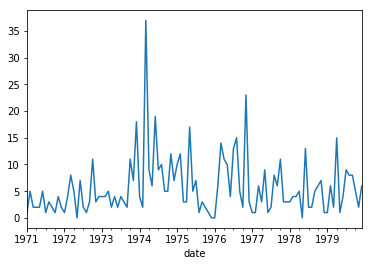

In [224]:
df['text'].groupby(pd.TimeGrouper('M')).count().plot(kind='line')

In [164]:
#date selector
df1970_1971 = df['1970':'1971']
df1975_1979 = df['1975':'1979']

In [171]:
df1970_1971['text'].to_csv("1970-1971.txt", sep=' ', index=False, header=False)